<a href="https://colab.research.google.com/github/cpalme28/MAT-421/blob/main/Module_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 - Coree Palmer

**17.4 - Lagrange Polynomial Interpolation**

Lagranage Polynomial Interpolation finds a single polynomial that goes through all the data points.
* The polynomial is refered to as a Lagrange polynomial, L(x), and should have the property $L(x_i) = y_i$ for every point in the data set.
* It is useful to write them as a linear combination of Lagrange basis polynomials $P_i(x)$, where $P_i(x)$ is the product of $(x - x_j)/(x_i - x_j)$ from j = 1 and j != i to n.
* It is also said that $L(x) = ∑y_i P_i(x)$ from i = 1 to n.
* $P_i(x)$ has the property that $P_i(x_j) = 1$ when i = j and $P_i(x_j) = 0$ when i != j. Thus, $L(x_i) = y_i$ for every point.

In [22]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

The following example is to find the Lagrange basis polynomials for the data set x = [0, 1, 2] and y = [1, 3, 2].

We then have the following:
* $P_1(x) = [(x - x_2)(x - x_3)]/[(x_1 - x_2)(x_1 - x_3)] = [(x - 1)(x - 2)]/[(0 - 1)(0 - 2)] = .5x^2 - 1.5x + 1$
* $P_2(x) = [(x - x_1)(x - x_3)]/[(x_2 - x_1)(x_2 - x_3)] = [(x - 0)(x - 2)]/[(1 - 0)(1 - 2)] = -x^2 + 2x$
* $P_3(x) = [(x - x_1)(x - x_2)]/[(x_3 - x_1)(x_3 - x_2)] = [(x - 0)(x - 1)]/[(2 - 0)(2 - 1)] = .5x^2 - .5x$

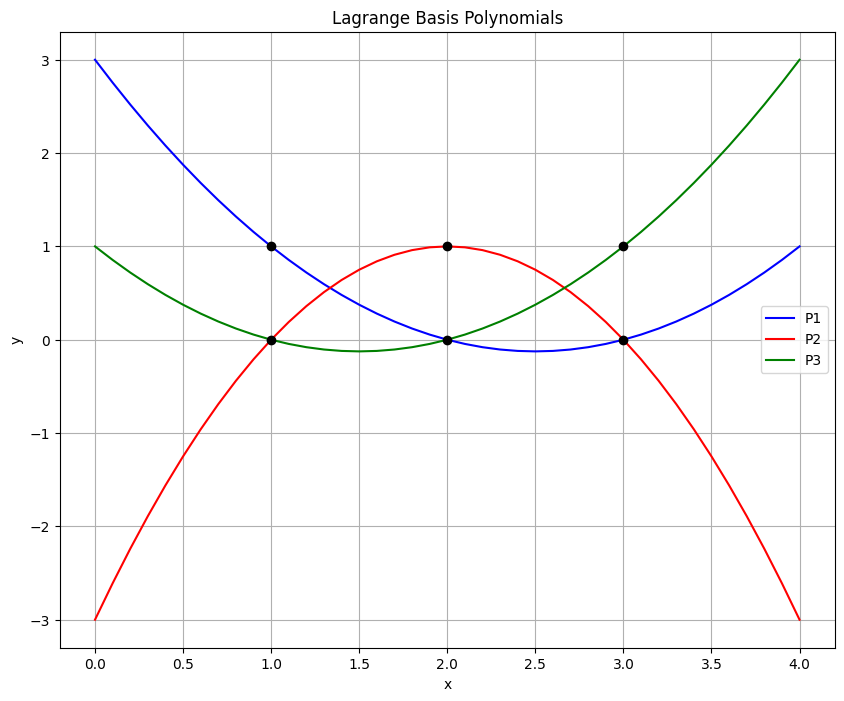

In [23]:
x = [1, 2, 3]
y = [3, 1, 4]

P1_coeff = [3, -2.5, 0.5]
P2_coeff = [-3, 4, -1]
P3_coeff = [1, -1.5, 0.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(0.0, 4.1, 0.1)

fig = plt.figure(figsize = (10, 8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Now it is time to sum the coefficients and the basis polynomials that will yield the the Lagrange Polynomial.

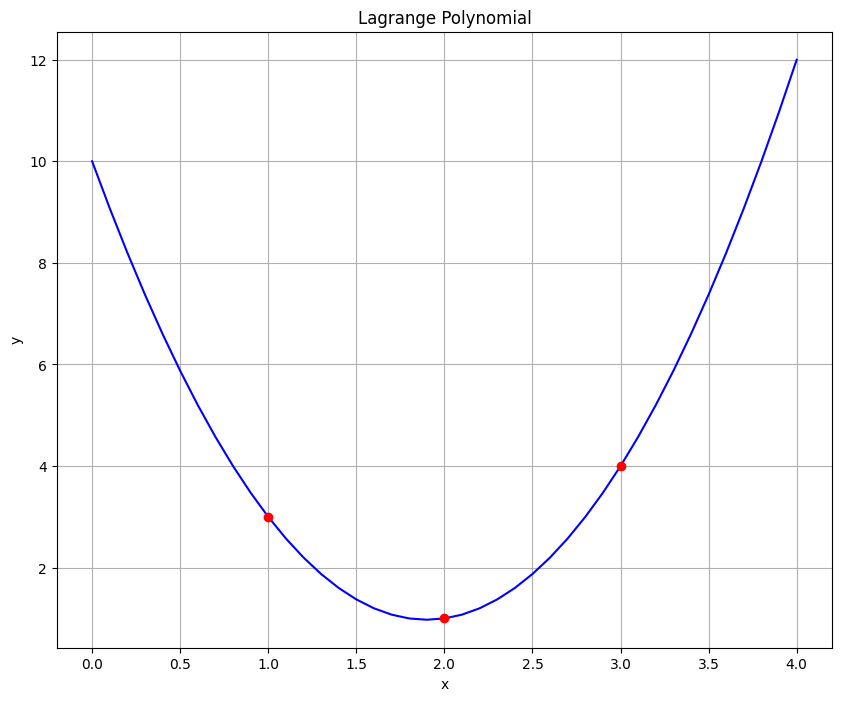

In [24]:
# y_i = [3, 1, 4]

L = 3*P1 + 1*P2 + 4*P3

fig = plt.figure(figsize = (10, 8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It is very important to note that Lagrange interpolation polynomials that are defined outside the area of interpolation (outside of the interval $[x_1, x_n]$) will grow very fast and unbounded outside this region.

Using Lagrange from scipy
* Instead of calculating everything from scratch, in scipy, we can use the *lagrange* function directly to interpolate the data.

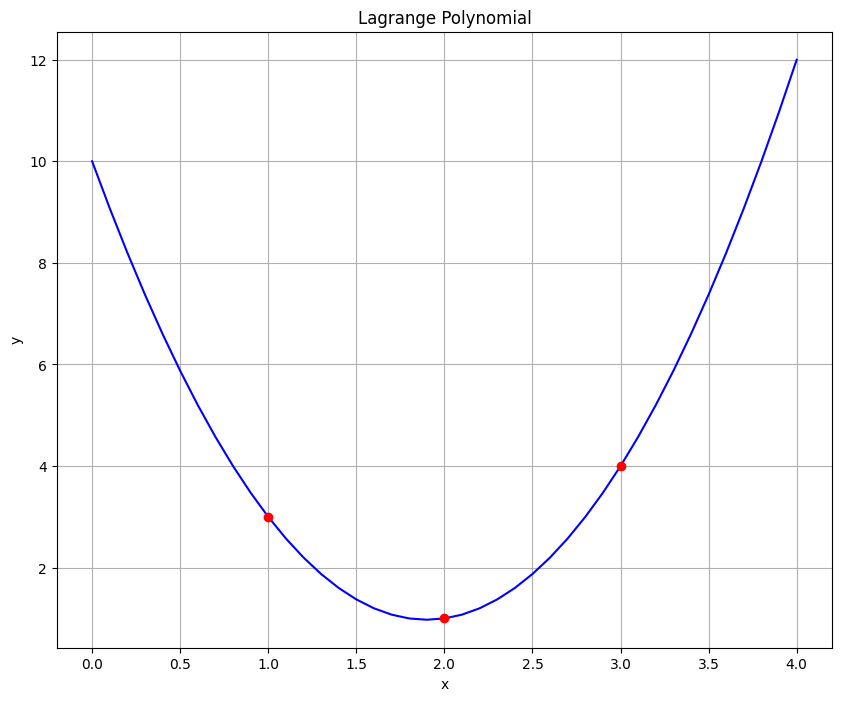

In [25]:
from scipy.interpolate import lagrange

f = lagrange(x, y)

fig = plt.figure(figsize = (10, 8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.5 - Newton's Polynomial Interpolation**

Newton's polynomial interpolation is another popular way to fit exactly for a set of data points. The general form can be written as the following:
$f(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + ... + a_n(x - x_0)(x - x_1)...(x - x_n)$.

That, too, can be rewritten as $f(x) = ∑a_i n_i(x)$ from i = 0 to n.

The special feature of this is that the coefficients $a_i$ can be determined using a simple procedure. Since the polynomial goes through each data point, for a data point $(x_i, y_i)$, we will have $f(x_i) = y_i$. Thus, we have:
* $f(x_0) = a_0 = y_0$

And $f(x_1) = a_0 + a_1(x_1 - x_0) = y_1$. By rearranging it to get $a_1$, we will have:
* $a_1 = (y_1 - y_0) / (x_1 - x_0)$

We can continue to do to fing a pattern, that is called divided differences. We get the following iteration equation:
* $f[x_k, x_{k-1},...,x_1, x_0] = (f[x_k, x_{k-1},...,x_2,x_2] - f[x_{k-1}, x_{k-2},...,x_1,x_0]) / (x_k - x_0)$

The following is an example when x = [-4, 0, 1, 3] and y = [3, -1, 1, 4].

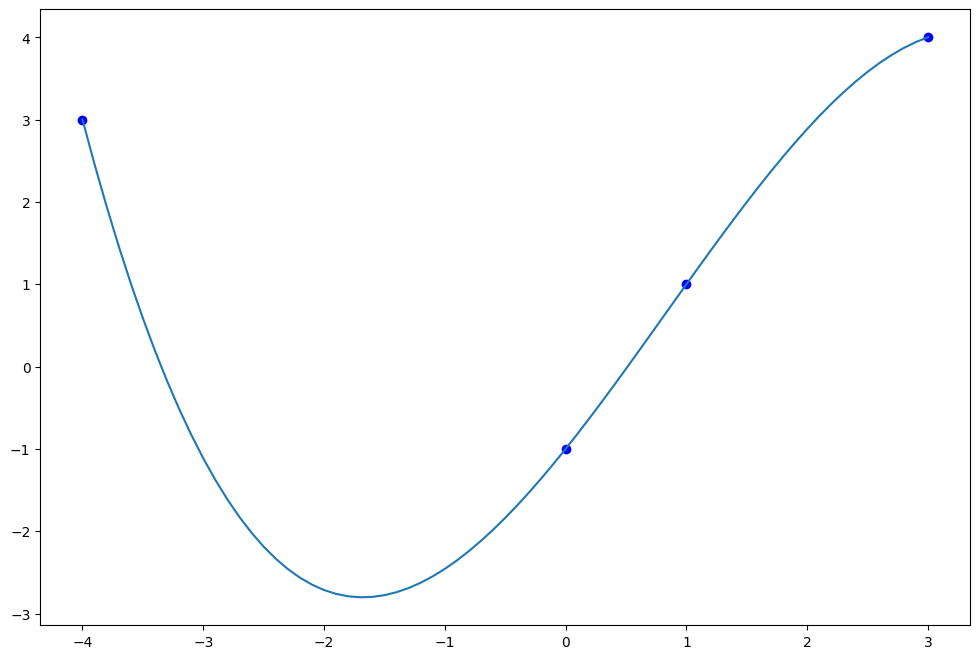

In [26]:
%matplotlib inline

def divided_diff(x, y):
  '''
  function to calculate the divided differences table
  '''
  n = len(y)
  coef = np.zeros([n,n])
  # the first column is y
  coef[:, 0] = y

  for j in range(1, n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1, n+1):
    p = coef[n-k] + (x - x_data[n-k])*p

  return p

x = np.array([-4, 0, 1, 3])
y = np.array([3, -1, 1, 4])

# get the divided difference coef
a_s = divided_diff(x,y)[0,:]

# evaluate on new data points
x_new = np.arange(-4, 3.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

As can be seen, the Newton's polynomial goes through all of the data points and fits the data without creating any sharp turns like linear interpolation does.